0it [00:00, ?it/s]

['image/filename', 'image/object/bbox/ymax', 'image/source_id', 'image/object/class/text', 'image/key/sha256', 'image/object/class/label', 'image/object/difficult', 'image/object/bbox/xmax', 'image/width', 'image/format', 'image/encoded', 'image/object/truncated', 'image/object/bbox/xmin', 'image/object/view', 'image/object/bbox/ymin', 'image/height']
class =  [b'human', b'head']
label =  [2, 1]
width =  640 ; height =  512
source_id =  b'FLIR_00004.jpeg'
difficult =  [0, 0]
xmin =  [0.09062500298023224, 0.09531249850988388]
ymin =  [0.455078125, 0.458984375]
xmax =  [0.11093749850988388, 0.10468749701976776]
ymax =  [0.494140625, 0.470703125]
[[ 58 233]
 [ 70 233]
 [ 70 253]
 [ 58 253]]
[[58, 233], [70, 233], [70, 253], [58, 253]]

[[ 60 235]
 [ 66 235]
 [ 66 241]
 [ 60 241]]
[[60, 235], [66, 235], [66, 241], [60, 241]]



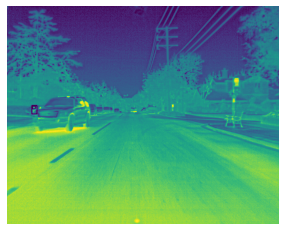

1it [00:00,  6.04it/s]

class =  [b'human']
label =  [2]
width =  640 ; height =  512
source_id =  b'FLIR_00053.jpeg'
difficult =  [0]
xmin =  [0.15312500298023224]
ymin =  [0.4609375]
xmax =  [0.171875]
ymax =  [0.5234375]
[[ 98 236]
 [110 236]
 [110 268]
 [ 98 268]]
[[98, 236], [110, 236], [110, 268], [98, 268]]



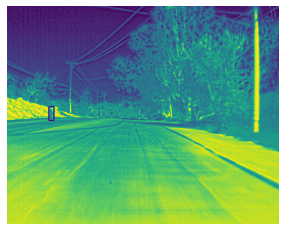

2it [00:00,  5.52it/s]

class =  [b'human', b'human', b'head', b'head']
label =  [2, 2, 1, 1]
width =  640 ; height =  512
source_id =  b'FLIR_00261.jpeg'
difficult =  [0, 0, 0, 0]
xmin =  [0.5531250238418579, 0.518750011920929, 0.528124988079071, 0.5609375238418579]
ymin =  [0.447265625, 0.443359375, 0.4453125, 0.451171875]
xmax =  [0.574999988079071, 0.543749988079071, 0.534375011920929, 0.567187488079071]
ymax =  [0.521484375, 0.5234375, 0.45703125, 0.4609375]
[[354 229]
 [367 229]
 [367 267]
 [354 267]]
[[354, 229], [367, 229], [367, 267], [354, 267]]

[[332 227]
 [347 227]
 [347 268]
 [332 268]]
[[332, 227], [347, 227], [347, 268], [332, 268]]

[[337 228]
 [342 228]
 [342 234]
 [337 234]]
[[337, 228], [342, 228], [342, 234], [337, 234]]

[[359 231]
 [362 231]
 [362 236]
 [359 236]]
[[359, 231], [362, 231], [362, 236], [359, 236]]



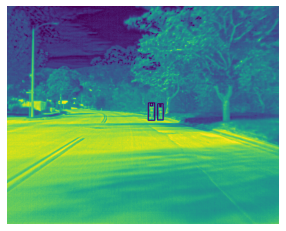

3it [00:00,  3.35it/s]


In [81]:
### Test a head detection model
from tqdm import tqdm
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import numpy as np

dataset = tf.data.TFRecordDataset("../数据库/Head detection/data/train/pascal.record-00000-of-00006")
# print(dataset)
count=0
for record in tqdm(dataset):
    count+=1
    if count>3:
        break
    # do something with the record
    example = tf.train.Example()
    example.ParseFromString(record.numpy())
    if count==1:
        feature_names = list(example.features.feature.keys())
        feature_values = list(example.features.feature.values())
        print(feature_names)
        # print(feature_values)
    image_encoded=example.features.feature['image/encoded'].bytes_list.value[0]
    # print("image encoded: ",image_encoded)
    image = tf.io.decode_jpeg(image_encoded)
    
    class_text=example.features.feature['image/object/class/text'].bytes_list.value
    print("class = ",class_text)
    print("label = ",example.features.feature['image/object/class/label'].int64_list.value)
    
    width=example.features.feature['image/width'].int64_list.value[0]
    height=example.features.feature['image/height'].int64_list.value[0]
    print('width = ',width,'; height = ',height)
    
    source_id=str(example.features.feature['image/source_id'].bytes_list.value[0])
    print('source_id = ', source_id)
    
    print('difficult = ', example.features.feature['image/object/difficult'].int64_list.value)
    
    
    xmin=example.features.feature['image/object/bbox/xmin'].float_list.value
    ymin=example.features.feature['image/object/bbox/ymin'].float_list.value
    xmax=example.features.feature['image/object/bbox/xmax'].float_list.value
    ymax=example.features.feature['image/object/bbox/ymax'].float_list.value
    print('xmin = ',xmin)
    print('ymin = ',ymin)
    print('xmax = ',xmax)
    print('ymax = ',ymax)

    image=image.numpy()
    
    for idx,cl in enumerate(class_text):
        xmin1=int(xmin[idx]*width)
        ymin1=int(ymin[idx]*height)
        xmax1=int(xmax[idx]*width)
        ymax1=int(ymax[idx]*height)
        
        pt1=[xmin1,ymin1]
        pt2=[xmax1,ymin1]
        pt3=[xmax1,ymax1]
        pt4=[xmin1,ymax1]
        
        points=np.array([pt1,pt2,pt3,pt4],np.int32)
        
        print(points)
        
        points=points.reshape((-1,1,2))
        
        # cv2.rectangle(image, (int(xmin1), int(ymin1)), (int(xmax1), int(ymax1)), (0,0,0), -1)
        
        print([pt1,pt2,pt3,pt4])
        
        cv2.polylines(image,[points],isClosed=True,color=(0,0,255),thickness=2)
        
        # cv2.fillPoly(image,pts=points,color=(0,255,255))
        
        print()
    
    
    plt.imshow(image)
    plt.axis("OFF")
    plt.show()
    
    
    



In [98]:
### Test a head detection model
from tqdm import tqdm
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import numpy as np
from quickcsv.file import *
import os

root_path=r'../数据库/Head detection/data/train'
list_filenames=[]
for file in os.listdir(root_path):
    list_filenames.append(os.path.join(root_path,file))

root_path=r'../数据库/Head detection/data/val'
for file in os.listdir(root_path):
    list_filenames.append(os.path.join(root_path,file))

dataset = tf.data.TFRecordDataset(list_filenames)
# print(dataset)
count=0
list_model=[]
for record in tqdm(dataset):
    count+=1
    # if count>10:
    #    break
    # do something with the record
    example = tf.train.Example()
    example.ParseFromString(record.numpy())
    if count==1:
        feature_names = list(example.features.feature.keys())
        feature_values = list(example.features.feature.values())
        print(feature_names)
        # print(feature_values)
    image_encoded=example.features.feature['image/encoded'].bytes_list.value[0]
    # print("image encoded: ",image_encoded)
    image_o = tf.io.decode_jpeg(image_encoded)
    
    class_text=example.features.feature['image/object/class/text'].bytes_list.value
    # print("class = ",class_text)
    # print("label = ",example.features.feature['image/object/class/label'].int64_list.value)
    
    width=example.features.feature['image/width'].int64_list.value[0]
    height=example.features.feature['image/height'].int64_list.value[0]
    # print('width = ',width,'; height = ',height)
    
    source_id=example.features.feature['image/source_id'].bytes_list.value[0].decode()
    
    
    # print('source_id = ', source_id)
    
    # print('difficult = ', example.features.feature['image/object/difficult'].int64_list.value)
    
    
    xmin=example.features.feature['image/object/bbox/xmin'].float_list.value
    ymin=example.features.feature['image/object/bbox/ymin'].float_list.value
    xmax=example.features.feature['image/object/bbox/xmax'].float_list.value
    ymax=example.features.feature['image/object/bbox/ymax'].float_list.value
    # print('xmin = ',xmin)
    # print('ymin = ',ymin)
    # print('xmax = ',xmax)
    # print('ymax = ',ymax)

    image=image_o.numpy()
    list_pts=[]
    for idx,cl in enumerate(class_text):
        xmin1=int(xmin[idx]*width)
        ymin1=int(ymin[idx]*height)
        xmax1=int(xmax[idx]*width)
        ymax1=int(ymax[idx]*height)
        
        pt1=[xmin1,ymin1]
        pt2=[xmax1,ymin1]
        pt3=[xmax1,ymax1]
        pt4=[xmin1,ymax1]
        
        pts=[pt1,pt2,pt3,pt4]
        
        points=np.array(pts,np.int32)
        
        # print(points)
        
        points=points.reshape((-1,1,2))
        
        # cv2.rectangle(image, (int(xmin1), int(ymin1)), (int(xmax1), int(ymax1)), (0,0,0), -1)
        
        # print([pt1,pt2,pt3,pt4])
        
        # cv2.polylines(image,[points],isClosed=True,color=(0,0,255),thickness=2)
        
        # cv2.fillPoly(image,pts=points,color=(0,255,255))
        list_p=[]
        for pt in pts:
            list_p.append(f'{pt[0]},{pt[1]}')
        list_pts.append(';'.join(list_p))
        # print()
        
    model={
        "name":source_id.replace(".jpeg",""),
        "masks":'|'.join(list_pts),
        "labels":'|'.join([c.decode() for c in class_text])
    }
        
    list_model.append(model)
    
    cv2.imwrite(f'datasets-thermal-head/thermal/{source_id}',image)
    
    
    '''
    plt.imshow(image)
    plt.axis("OFF")
    plt.show()
    '''
    
write_csv('datasets-thermal-head/list_detection.csv',list_model)

    
    



3it [00:00, 29.47it/s]

['image/object/class/label', 'image/object/bbox/xmin', 'image/width', 'image/source_id', 'image/object/bbox/ymin', 'image/filename', 'image/format', 'image/object/truncated', 'image/object/view', 'image/encoded', 'image/key/sha256', 'image/height', 'image/object/difficult', 'image/object/bbox/xmax', 'image/object/bbox/ymax', 'image/object/class/text']


7044it [03:08, 37.43it/s]


Write CSV: ['name', 'masks', 'labels']  -> (datasets-thermal-head/list_detection.csv)


In [17]:
import tensorflow as tf

filenames = ["pascal.record-00000-of-00006"]
dataset = tf.data.TFRecordDataset(filenames)

def _parse_function(example_proto):
    features = {
        'image/object/class/text': tf.io.FixedLenFeature([], tf.string),
        'image/encoded': tf.io.FixedLenFeature([], tf.int64),
    }
    parsed_features = tf.io.parse_single_example(example_proto, features)
    image = tf.io.decode_raw(parsed_features['image/encoded'], tf.uint8)
    image = tf.io.reshape(image, [32, 32, 3])
    label = parsed_features['image/object/class/text']
    
    return image,label

dataset = dataset.map(_parse_function)
iterator = dataset.make_one_shot_iterator()

with tf.Session() as sess:
    try:
        while True:
            f1, f2= sess.run(iterator.get_next())
            print(f1, f2)
    except tf.errors.OutOfRangeError:
        pass

TypeError: in user code:

    File "C:\Users\dougl\AppData\Local\Temp\ipykernel_19344\2406357499.py", line 12, in _parse_function  *
        image = tf.io.decode_raw(parsed_features['image/encoded'], tf.uint8)

    TypeError: Input 'bytes' of 'DecodeRaw' Op has type int64 that does not match expected type of string.


In [18]:
import time
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils

PATH_TO_SAVED_MODEL = '../数据库/Head detection/IR-thermal-head-detection-and-tracking-main/models/efficientdet_d0'

print('Loading model...', end='')
start_time = time.time()

# Load saved model and build the detection function
detect_fn = tf.saved_model.load(PATH_TO_SAVED_MODEL)

end_time = time.time()
elapsed_time = end_time - start_time
print('Done! Took {} seconds'.format(elapsed_time))

ModuleNotFoundError: No module named 'object_detection'